In [1]:
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Define the cutoff frequencies and order of the filter
lowcut = 0.5
highcut = 30
order = 6

In [9]:
def mean_removel_linear_detrended(signal, fs, lowcut, highcut):
    
    from scipy.signal import butter, filtfilt
    import numpy as np
    import matplotlib.pyplot as plt

    # Baseline Correction: Mean Removal
    mean_removed_signal = signal - np.mean(signal)

    time = np.linspace(0, 1, len(signal))
    
    # Baseline Correction: Linear Detrending
    trend = np.polyfit(time, mean_removed_signal, 1)
    linear_detrended_signal = mean_removed_signal - (trend[0] * time + trend[1])



#     def butter_bandpass(lowcut, highcut, fs, order=5):
#         nyquist = 0.5 * fs
#         low = lowcut / nyquist
#         high = highcut / nyquist
#         b, a = butter(order, [low, high], btype='band')
#         return b, a

#     def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
#         b, a = butter_bandpass(lowcut, highcut, fs, order=order)
#         y = filtfilt(b, a, data)
#         return y



#     # Apply bandpass filter
#     filtered_signal = butter_bandpass_filter(linear_detrended_signal, lowcut, highcut, fs, order=5)

#     # Plot the original signal, mean removed signal, linear detrended signal, and filtered signal
#     plt.figure(figsize=(10, 6))

#     plt.subplot(411)
#     plt.plot(time, signal)
#     plt.title('Original Signal')

#     plt.subplot(412)
#     plt.plot(time, mean_removed_signal)
#     plt.title('Mean Removed Signal')

#     plt.subplot(413)
#     plt.plot(time, linear_detrended_signal)
#     plt.title('Linear Detrended Signal')

#     plt.subplot(414)
#     plt.plot(time, filtered_signal)
#     plt.title('Filtered Signal')

#     plt.tight_layout()
#     plt.show()

    return linear_detrended_signal

In [7]:
def image_hanning_minwidth(signal, fs, minn):
    import numpy as np
    from scipy.signal import hann
    tmp = int(len(signal)/(minn*60*fs))
    signal = signal[:int(tmp*minn*60*fs)]
    signal_reshaped = signal.reshape(-1,int(minn*60*fs))
    window_size = signal_reshaped.shape[1]
    hanning_window = hann(window_size, sym=False)
    signal_hann = np.apply_along_axis(lambda x: x * hanning_window, axis=1, arr=signal_reshaped)
#     print(signal_hann.shape)
    return signal_hann

In [8]:
from efficientnet_pytorch import EfficientNet
import numpy as np
import os
import torch


patinet_list = np.load("file_n.npy")
label_n = np.load("label_n.npy")
label_n = label_n.astype(int)
duration = np.load("duration_tmp.npy")


number of signals 11


In [31]:
# Convert to .mat files
savemat("patinet_list.mat", {'patinet_list': patinet_list})

savemat("label_n.mat", {'label_n': label_n})

In [ ]:
savemat("D:/Directory_D_Desk_jup/Raw_npy/Signal_EEG/{}_0.mat".format(name[:-7]), {'signal': signal})

feature extractor BERT:

In [5]:
import torch
from transformers import BertModel, BertTokenizer

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
model = BertModel.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

# Example text
text = "I love you dari?"

# Tokenize the text and get BERT input format
inputs = tokenizer(text, return_tensors="pt")
print(inputs)
outputs = model(**inputs)

# Example text
text = "I hate you dari?.dad is home. where are you?"

# Tokenize the text and get BERT input format
inputs = tokenizer(text, return_tensors="pt")
print(inputs)
outputs = model(**inputs)

# Get the hidden states from the output
hidden_states = outputs.last_hidden_state

# For simple classification, you can use the [CLS] token representation
cls_token = hidden_states[:, 0, :]

# Now you can use 'cls_token' for classification tasks


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'input_ids': tensor([[  101,  1045,  2293,  2017, 18243,  2072,  1029,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}
{'input_ids': tensor([[  101,  1045,  5223,  2017, 18243,  2072,  1029,  1012,  3611,  2003,
          2188,  1012,  2073,  2024,  2017,  1029,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [28]:
a1 = str(np.load("D:/Directory_D_Desk_jup/Raw_npy/Signal_THOR_Arousal/shhs1-200023_ds.npy"))
a1 = tokenizer(a, return_tensors="pt")
a1

{'input_ids': tensor([[  101,  1031,  1011,  1014,  1012,  5641, 17914, 23499, 19317,  1011,
          1014,  1012,  8746,  2620,  2620, 21926,  2629,  1011,  1014,  1012,
          8746,  2620,  2620, 21926,  2629,  1012,  1012,  1012,  1014,  1012,
          5757, 28756, 28756,  2575,  2581,  1014,  1012, 28714,  2683, 17914,
         23499,  1014,  1012,  5890,  2683, 16086,  2581,  2620,  2549,  1033,
           102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1]])}

In [19]:
len(label_n)

1811

In [33]:
# for idx, name in enumerate(patinet_list):
#     print(name[:-7]+".npy")
#     if label_n[idx] == 0:
#         # Load the NumPy array
#         signal1 = np.load("D:/Directory_D_Desk_jup/Raw_npy/Signal_EEG/"+name[:-7]+".npy")
#         # Save it as a .mat file
#         savemat("D:/Directory_D_Desk_jup/Raw_npy/Signal_EEG/"+name[:-7]+".mat", {'signal1': signal1})
    
#     if label_n[idx] == 1:
#         # Load the NumPy array
#         signal1 = np.load("D:/Directory_D_Desk_jup/Raw_npy/Signal_EEG/"+name[:-7]+".npy")
#         # Save it as a .mat file
#         savemat("D:/Directory_D_Desk_jup/Raw_npy/Signal_EEG/"+name[:-7]+".mat", {'signal1': signal1})
        

In [35]:
import numpy as np
from scipy.io import savemat

for idx, name in enumerate(patinet_list[:20]):
    
    signal = np.load("D:/Directory_D_Desk_jup/Raw_npy/Signal_EEG/"+name[:-7]+".npy")
    
    if label_n[idx] == 0:
        print(name[:-7]+".npy", label_n[idx], "{}.mat".format(name[:-7]))
        # Save it as a .mat file with a dynamic name
        savemat("D:/Directory_D_Desk_jup/Raw_npy/Signal_EEG/{}.mat".format(name[:-7]), {'signal': signal})
    
    if label_n[idx] == 1:
        print(name[:-7]+".npy", label_n[idx], "{}_1.mat".format(name[:-7]))
        # Save it as a .mat file with a dynamic name
        savemat("D:/Directory_D_Desk_jup/Raw_npy/Signal_EEG/{}.mat".format(name[:-7]), {'signal': signal})


shhs1-200028.npy 0 shhs1-200028.mat
shhs1-200023.npy 1 shhs1-200023_1.mat
shhs1-200031.npy 0 shhs1-200031.mat
shhs1-200037.npy 1 shhs1-200037_1.mat
shhs1-200033.npy 0 shhs1-200033.mat
shhs1-200046.npy 1 shhs1-200046_1.mat
shhs1-200038.npy 0 shhs1-200038.mat
shhs1-200077.npy 1 shhs1-200077_1.mat
shhs1-200040.npy 0 shhs1-200040.mat
shhs1-200078.npy 1 shhs1-200078_1.mat
shhs1-200041.npy 0 shhs1-200041.mat
shhs1-200080.npy 1 shhs1-200080_1.mat
shhs1-200059.npy 0 shhs1-200059.mat
shhs1-200084.npy 1 shhs1-200084_1.mat
shhs1-200079.npy 0 shhs1-200079.mat
shhs1-200088.npy 1 shhs1-200088_1.mat
shhs1-200082.npy 0 shhs1-200082.mat
shhs1-200093.npy 1 shhs1-200093_1.mat
shhs1-200083.npy 0 shhs1-200083.mat
shhs1-200103.npy 1 shhs1-200103_1.mat


In [ ]:
shhs1-200028_0
shhs1-200023_1

In [38]:
len(arr1), len(arr2), len(arr3)

(51, 51, 51)

In [37]:
# Convert lists to numpy arrays
arr1 = np.array(a1['input_ids'][0])
arr2 = np.array(a2['input_ids'][0])
arr3 = np.array(a3['input_ids'][0])

# Pad the sequences to a fixed length
max_seq_length = max(len(arr1), len(arr2), len(arr3))
arr1 = np.pad(arr1, (0, max_seq_length - len(arr1)), mode='constant')
arr2 = np.pad(arr2, (0, max_seq_length - len(arr2)), mode='constant')
arr3 = np.pad(arr3, (0, max_seq_length - len(arr3)), mode='constant')


# Calculate absolute differences
diff1 = np.abs(arr1 - arr2)
diff2 = np.abs(arr2 - arr3)
diff3 = np.abs(arr3 - arr1)

# Calculate mean difference
mean_diff = np.mean([diff1, diff2, diff3])

print(f"The mean difference between the three sets is: {mean_diff}")

The mean difference between the three sets is: 5812.496732026144


In [25]:
a3 = ["1","2","3","4"]
a3 = tokenizer(a3, return_tensors="pt")
a3

{'input_ids': tensor([[ 101, 1015,  102],
        [ 101, 1016,  102],
        [ 101, 1017,  102],
        [ 101, 1018,  102]]), 'token_type_ids': tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])}

In [26]:
a3 = str([1,2,3,4])
a3 = tokenizer(a3, return_tensors="pt")
a3

{'input_ids': tensor([[ 101, 1031, 1015, 1010, 1016, 1010, 1017, 1010, 1018, 1033,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

feature extracting by pretrained models:

In [37]:
import time
minn = 2 #miniutes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.empty_cache()

fil_names = ["Signal_ABDO", "Signal_NEWAIR", "Signal_H", "Signal_ECG", "Signal_EOG_L", "Signal_EMG", "Signal_POSITION", "Signal_EEG", "Signal_EOG_R", "Signal_THOR", "Signal_SaO2_OX"]
print("number of signals", len(fil_names))
fs = [10, 10, 1, 125, 50, 125, 1, 125, 50, 10, 1]


for idx, signal_name in enumerate(fil_names):
    print("----", signal_name)
    t1 = time.time()
    for patinet in patinet_list:
        if fs[idx] == 1:
            lowcut = 0.1
            highcut = 0.4
        else:
            lowcut = 0.1
            highcut = np.min([fs[idx]//4, 30])
        
        
        Signal = np.load("D:/Directory_D_Desk_jup/Raw_npy/"+signal_name+"/"+patinet[:-7]+".npy")
        Signal = Signal[:fs[idx]*duration[idx]]
        linear_detrended_signal = mean_removel_linear_detrended_butter(Signal, fs[idx], lowcut, highcut)
        filtered_signal = butter_bandpass_filter(linear_detrended_signal, lowcut, highcut, fs[idx], order=order)
        img = image_hanning_minwidth(filtered_signal, fs[idx], minn)
        image_array_3_channel = np.repeat(img[:, :, np.newaxis], 3, axis=2)
        
        input_tensor = torch.from_numpy(image_array_3_channel).permute(2, 0, 1).float().to(device)

        model = EfficientNet.from_pretrained('efficientnet-b0')
        model.eval()

        model = model.to(device)

        with torch.no_grad():
            feature = model(input_tensor.unsqueeze(0))
        torch.cuda.empty_cache()

        np.save(signal_name+"/"+patinet, feature.cpu())
        
    print("Timeing:", (time.time() - t1)//60)

number of signals 11
---- Signal_ABDO
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for effi

RuntimeError: CUDA out of memory. Tried to allocate 372.00 MiB (GPU 0; 8.00 GiB total capacity; 870.79 MiB already allocated; 4.86 GiB free; 950.00 MiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

combining the outcomes and make a new images:

In [56]:
import matplotlib.pyplot as plt

for p_idx, patinet in enumerate(patinet_list):
    print(patinet, "  L", label_n[p_idx],"--------------------------------------")
    tmp = np.zeros((11,1000))
    for idx, signal_name in enumerate(fil_names):
#         print(np.load(signal_name+"/"+patinet).shape)
        tmp[idx,:] = np.load(signal_name+"/"+patinet)
    
    tmp = np.repeat(tmp, 90, axis=0)
    
#     plt.imshow(tmp, cmap='gray')  # 'gray' colormap for grayscale images
#     plt.colorbar()  # Optional: add a colorbar
#     plt.show()

   
    if label_n[p_idx] == 0:
        np.save("data_feature_effb7"+"/class_0/"+patinet, tmp)
    
    if label_n[p_idx] == 1:
        np.save("data_feature_effb7"+"/class_1/"+patinet, tmp)
    

shhs1-200028_ds.npy   L 0 --------------------------------------
shhs1-200023_ds.npy   L 1 --------------------------------------
shhs1-200031_ds.npy   L 0 --------------------------------------
shhs1-200037_ds.npy   L 1 --------------------------------------
shhs1-200033_ds.npy   L 0 --------------------------------------
shhs1-200046_ds.npy   L 1 --------------------------------------
shhs1-200038_ds.npy   L 0 --------------------------------------
shhs1-200077_ds.npy   L 1 --------------------------------------
shhs1-200040_ds.npy   L 0 --------------------------------------
shhs1-200078_ds.npy   L 1 --------------------------------------
shhs1-200041_ds.npy   L 0 --------------------------------------
shhs1-200080_ds.npy   L 1 --------------------------------------
shhs1-200059_ds.npy   L 0 --------------------------------------
shhs1-200084_ds.npy   L 1 --------------------------------------
shhs1-200079_ds.npy   L 0 --------------------------------------
shhs1-200088_ds.npy   L 1

shhs1-200355_ds.npy   L 0 --------------------------------------
shhs1-200455_ds.npy   L 1 --------------------------------------
shhs1-200358_ds.npy   L 0 --------------------------------------
shhs1-200459_ds.npy   L 1 --------------------------------------
shhs1-200363_ds.npy   L 0 --------------------------------------
shhs1-200460_ds.npy   L 1 --------------------------------------
shhs1-200364_ds.npy   L 0 --------------------------------------
shhs1-200465_ds.npy   L 1 --------------------------------------
shhs1-200367_ds.npy   L 0 --------------------------------------
shhs1-200479_ds.npy   L 1 --------------------------------------
shhs1-200368_ds.npy   L 0 --------------------------------------
shhs1-200483_ds.npy   L 1 --------------------------------------
shhs1-200375_ds.npy   L 0 --------------------------------------
shhs1-200484_ds.npy   L 1 --------------------------------------
shhs1-200378_ds.npy   L 0 --------------------------------------
shhs1-200494_ds.npy   L 1

shhs1-200586_ds.npy   L 0 --------------------------------------
shhs1-200866_ds.npy   L 1 --------------------------------------
shhs1-200587_ds.npy   L 0 --------------------------------------
shhs1-200868_ds.npy   L 1 --------------------------------------
shhs1-200588_ds.npy   L 0 --------------------------------------
shhs1-200874_ds.npy   L 1 --------------------------------------
shhs1-200591_ds.npy   L 0 --------------------------------------
shhs1-200877_ds.npy   L 1 --------------------------------------
shhs1-200592_ds.npy   L 0 --------------------------------------
shhs1-200880_ds.npy   L 1 --------------------------------------
shhs1-200593_ds.npy   L 0 --------------------------------------
shhs1-200882_ds.npy   L 1 --------------------------------------
shhs1-200594_ds.npy   L 0 --------------------------------------
shhs1-200885_ds.npy   L 1 --------------------------------------
shhs1-200597_ds.npy   L 0 --------------------------------------
shhs1-200890_ds.npy   L 1

shhs1-201076_ds.npy   L 1 --------------------------------------
shhs1-200781_ds.npy   L 0 --------------------------------------
shhs1-201079_ds.npy   L 1 --------------------------------------
shhs1-200782_ds.npy   L 0 --------------------------------------
shhs1-201082_ds.npy   L 1 --------------------------------------
shhs1-200784_ds.npy   L 0 --------------------------------------
shhs1-201085_ds.npy   L 1 --------------------------------------
shhs1-200792_ds.npy   L 0 --------------------------------------
shhs1-201088_ds.npy   L 1 --------------------------------------
shhs1-200798_ds.npy   L 0 --------------------------------------
shhs1-201089_ds.npy   L 1 --------------------------------------
shhs1-200822_ds.npy   L 0 --------------------------------------
shhs1-201091_ds.npy   L 1 --------------------------------------
shhs1-200825_ds.npy   L 0 --------------------------------------
shhs1-201092_ds.npy   L 1 --------------------------------------
shhs1-200833_ds.npy   L 0

shhs1-201443_ds.npy   L 1 --------------------------------------
shhs1-201285_ds.npy   L 0 --------------------------------------
shhs1-201445_ds.npy   L 1 --------------------------------------
shhs1-201289_ds.npy   L 0 --------------------------------------
shhs1-201448_ds.npy   L 1 --------------------------------------
shhs1-201292_ds.npy   L 0 --------------------------------------
shhs1-201453_ds.npy   L 1 --------------------------------------
shhs1-201297_ds.npy   L 0 --------------------------------------
shhs1-201455_ds.npy   L 1 --------------------------------------
shhs1-201306_ds.npy   L 0 --------------------------------------
shhs1-201458_ds.npy   L 1 --------------------------------------
shhs1-201310_ds.npy   L 0 --------------------------------------
shhs1-201459_ds.npy   L 1 --------------------------------------
shhs1-201318_ds.npy   L 0 --------------------------------------
shhs1-201462_ds.npy   L 1 --------------------------------------
shhs1-201319_ds.npy   L 0

shhs1-201977_ds.npy   L 0 --------------------------------------
shhs1-201749_ds.npy   L 1 --------------------------------------
shhs1-201983_ds.npy   L 0 --------------------------------------
shhs1-201750_ds.npy   L 1 --------------------------------------
shhs1-201992_ds.npy   L 0 --------------------------------------
shhs1-201751_ds.npy   L 1 --------------------------------------
shhs1-202004_ds.npy   L 0 --------------------------------------
shhs1-201753_ds.npy   L 1 --------------------------------------
shhs1-202010_ds.npy   L 0 --------------------------------------
shhs1-201755_ds.npy   L 1 --------------------------------------
shhs1-202021_ds.npy   L 0 --------------------------------------
shhs1-201756_ds.npy   L 1 --------------------------------------
shhs1-202031_ds.npy   L 0 --------------------------------------
shhs1-201760_ds.npy   L 1 --------------------------------------
shhs1-202034_ds.npy   L 0 --------------------------------------
shhs1-201761_ds.npy   L 1

shhs1-202406_ds.npy   L 0 --------------------------------------
shhs1-202168_ds.npy   L 1 --------------------------------------
shhs1-202407_ds.npy   L 0 --------------------------------------
shhs1-202176_ds.npy   L 1 --------------------------------------
shhs1-202410_ds.npy   L 0 --------------------------------------
shhs1-202185_ds.npy   L 1 --------------------------------------
shhs1-202415_ds.npy   L 0 --------------------------------------
shhs1-202189_ds.npy   L 1 --------------------------------------
shhs1-202417_ds.npy   L 0 --------------------------------------
shhs1-202191_ds.npy   L 1 --------------------------------------
shhs1-202418_ds.npy   L 0 --------------------------------------
shhs1-202193_ds.npy   L 1 --------------------------------------
shhs1-202419_ds.npy   L 0 --------------------------------------
shhs1-202199_ds.npy   L 1 --------------------------------------
shhs1-202421_ds.npy   L 0 --------------------------------------
shhs1-202210_ds.npy   L 1

shhs1-202756_ds.npy   L 0 --------------------------------------
shhs1-202622_ds.npy   L 1 --------------------------------------
shhs1-202758_ds.npy   L 0 --------------------------------------
shhs1-202625_ds.npy   L 1 --------------------------------------
shhs1-202759_ds.npy   L 0 --------------------------------------
shhs1-202638_ds.npy   L 1 --------------------------------------
shhs1-202760_ds.npy   L 0 --------------------------------------
shhs1-202648_ds.npy   L 1 --------------------------------------
shhs1-202763_ds.npy   L 0 --------------------------------------
shhs1-202664_ds.npy   L 1 --------------------------------------
shhs1-202764_ds.npy   L 0 --------------------------------------
shhs1-202668_ds.npy   L 1 --------------------------------------
shhs1-202771_ds.npy   L 0 --------------------------------------
shhs1-202693_ds.npy   L 1 --------------------------------------
shhs1-202775_ds.npy   L 0 --------------------------------------
shhs1-202705_ds.npy   L 1

shhs1-203012_ds.npy   L 0 --------------------------------------
shhs1-202973_ds.npy   L 1 --------------------------------------
shhs1-203018_ds.npy   L 0 --------------------------------------
shhs1-202975_ds.npy   L 1 --------------------------------------
shhs1-203023_ds.npy   L 0 --------------------------------------
shhs1-202976_ds.npy   L 1 --------------------------------------
shhs1-203025_ds.npy   L 0 --------------------------------------
shhs1-202978_ds.npy   L 1 --------------------------------------
shhs1-203035_ds.npy   L 0 --------------------------------------
shhs1-202984_ds.npy   L 1 --------------------------------------
shhs1-203045_ds.npy   L 0 --------------------------------------
shhs1-202986_ds.npy   L 1 --------------------------------------
shhs1-203046_ds.npy   L 0 --------------------------------------
shhs1-203001_ds.npy   L 1 --------------------------------------
shhs1-203047_ds.npy   L 0 --------------------------------------
shhs1-203003_ds.npy   L 1

shhs1-203248_ds.npy   L 1 --------------------------------------
shhs1-203240_ds.npy   L 0 --------------------------------------
shhs1-203253_ds.npy   L 1 --------------------------------------
shhs1-203243_ds.npy   L 0 --------------------------------------
shhs1-203257_ds.npy   L 1 --------------------------------------
shhs1-203244_ds.npy   L 0 --------------------------------------
shhs1-203258_ds.npy   L 1 --------------------------------------
shhs1-203245_ds.npy   L 0 --------------------------------------
shhs1-203261_ds.npy   L 1 --------------------------------------
shhs1-203251_ds.npy   L 0 --------------------------------------
shhs1-203262_ds.npy   L 1 --------------------------------------
shhs1-203252_ds.npy   L 0 --------------------------------------
shhs1-203268_ds.npy   L 1 --------------------------------------
shhs1-203255_ds.npy   L 0 --------------------------------------
shhs1-203272_ds.npy   L 1 --------------------------------------
shhs1-203256_ds.npy   L 0

shhs1-203560_ds.npy   L 1 --------------------------------------
shhs1-203425_ds.npy   L 0 --------------------------------------
shhs1-203561_ds.npy   L 1 --------------------------------------
shhs1-203427_ds.npy   L 0 --------------------------------------
shhs1-203564_ds.npy   L 1 --------------------------------------
shhs1-203428_ds.npy   L 0 --------------------------------------
shhs1-203565_ds.npy   L 1 --------------------------------------
shhs1-203429_ds.npy   L 0 --------------------------------------
shhs1-203570_ds.npy   L 1 --------------------------------------
shhs1-203430_ds.npy   L 0 --------------------------------------
shhs1-203571_ds.npy   L 1 --------------------------------------
shhs1-203431_ds.npy   L 0 --------------------------------------
shhs1-203573_ds.npy   L 1 --------------------------------------
shhs1-203432_ds.npy   L 0 --------------------------------------
shhs1-203575_ds.npy   L 1 --------------------------------------
shhs1-203434_ds.npy   L 0

shhs1-203759_ds.npy   L 1 --------------------------------------
shhs1-203690_ds.npy   L 0 --------------------------------------
shhs1-203761_ds.npy   L 1 --------------------------------------
shhs1-203692_ds.npy   L 0 --------------------------------------
shhs1-203763_ds.npy   L 1 --------------------------------------
shhs1-203694_ds.npy   L 0 --------------------------------------
shhs1-203764_ds.npy   L 1 --------------------------------------
shhs1-203695_ds.npy   L 0 --------------------------------------
shhs1-203767_ds.npy   L 1 --------------------------------------
shhs1-203697_ds.npy   L 0 --------------------------------------
shhs1-203772_ds.npy   L 1 --------------------------------------
shhs1-203703_ds.npy   L 0 --------------------------------------
shhs1-203773_ds.npy   L 1 --------------------------------------
shhs1-203704_ds.npy   L 0 --------------------------------------
shhs1-203774_ds.npy   L 1 --------------------------------------
shhs1-203705_ds.npy   L 0

shhs1-204007_ds.npy   L 1 --------------------------------------
shhs1-203960_ds.npy   L 0 --------------------------------------
shhs1-204011_ds.npy   L 1 --------------------------------------
shhs1-203962_ds.npy   L 0 --------------------------------------
shhs1-204014_ds.npy   L 1 --------------------------------------
shhs1-203972_ds.npy   L 0 --------------------------------------
shhs1-204020_ds.npy   L 1 --------------------------------------
shhs1-203974_ds.npy   L 0 --------------------------------------
shhs1-204022_ds.npy   L 1 --------------------------------------
shhs1-203975_ds.npy   L 0 --------------------------------------
shhs1-204023_ds.npy   L 1 --------------------------------------
shhs1-203984_ds.npy   L 0 --------------------------------------
shhs1-204025_ds.npy   L 1 --------------------------------------
shhs1-203985_ds.npy   L 0 --------------------------------------
shhs1-204026_ds.npy   L 1 --------------------------------------
shhs1-203990_ds.npy   L 0

shhs1-204308_ds.npy   L 0 --------------------------------------
shhs1-204270_ds.npy   L 1 --------------------------------------
shhs1-204311_ds.npy   L 0 --------------------------------------
shhs1-204271_ds.npy   L 1 --------------------------------------
shhs1-204273_ds.npy   L 1 --------------------------------------
shhs1-204277_ds.npy   L 1 --------------------------------------
shhs1-204284_ds.npy   L 1 --------------------------------------
shhs1-204286_ds.npy   L 1 --------------------------------------
shhs1-204290_ds.npy   L 1 --------------------------------------
shhs1-204296_ds.npy   L 1 --------------------------------------
shhs1-204297_ds.npy   L 1 --------------------------------------
shhs1-204300_ds.npy   L 1 --------------------------------------
shhs1-204306_ds.npy   L 1 --------------------------------------
shhs1-204307_ds.npy   L 1 --------------------------------------
shhs1-204309_ds.npy   L 1 --------------------------------------


Rowise find the distribution of data

In [80]:
def plotting_distribution(list_of_data):
    import numpy as np
    import matplotlib.pyplot as plt

    # Initialize empty lists to store means and stds for each class
    class_0_means = []
    class_0_stds = []
    class_1_means = []
    class_1_stds = []

    for array, label in zip(np.array(list_of_data), label_n):
        if label == 0:
            class_0_means.append(np.mean(array))
            class_0_stds.append(np.std(array))
        elif label == 1:
            class_1_means.append(np.mean(array))
            class_1_stds.append(np.std(array))

    # Plot distributions
    plt.scatter(class_0_means, class_0_stds, color='blue', label='Class 0')
    plt.scatter(class_1_means, class_1_stds, color='red', label='Class 1')

    plt.xlabel('Mean')
    plt.ylabel('Standard Deviation')
    plt.legend()
    plt.title('Distribution of Class 0 and Class 1')
    plt.show()


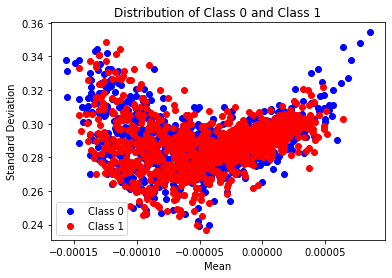

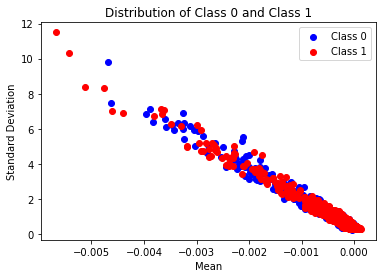

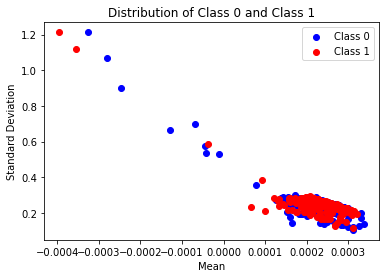

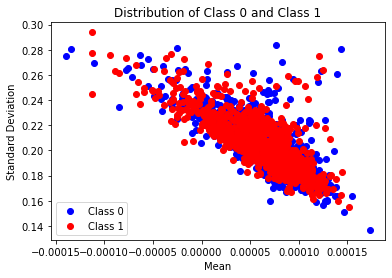

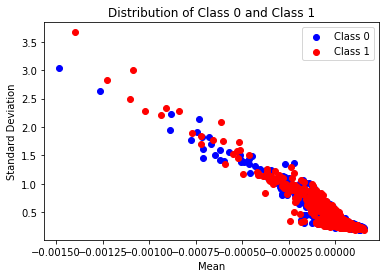

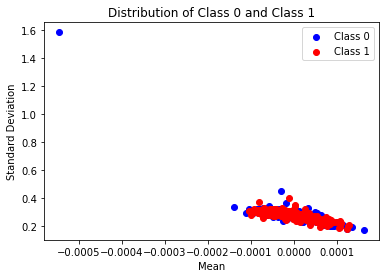

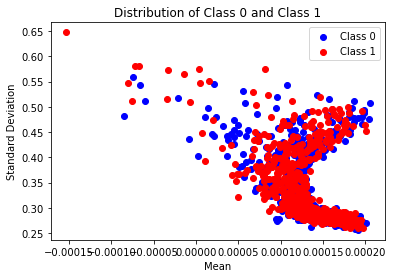

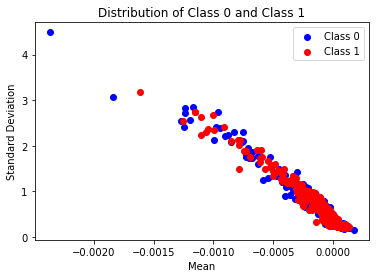

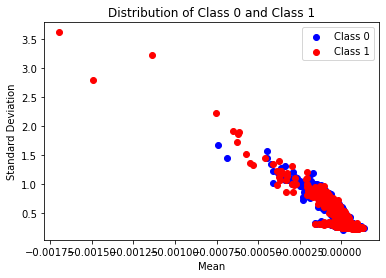

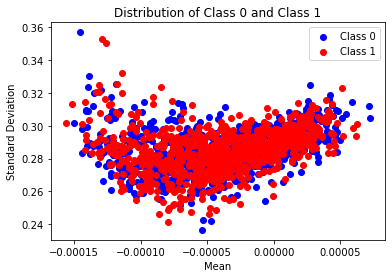

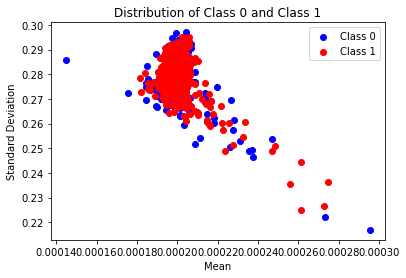

In [81]:
for s in range(11):
    list_of_data = []
    for p_idx, patinet in enumerate(patinet_list):
#         print(patinet, "  L", label_n[p_idx],"--------------------------------------")
        tmp = np.zeros((11,1000))
        for idx, signal_name in enumerate(fil_names[s:s+1]):
    #         print(np.load(signal_name+"/"+patinet).shape)
            tmp[idx,:] = np.load(signal_name+"/"+patinet)
        list_of_data.append(tmp)
        
    plotting_distribution(list_of_data)

In [58]:
np.array(list_of_data).shape

(1811, 11, 1000)

In [71]:
seed = 19

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare the data
class_0_data = list(zip(class_0_means, class_0_stds))
class_1_data = list(zip(class_1_means, class_1_stds))
data = class_0_data + class_1_data
labels = [0] * len(class_0_data) + [1] * len(class_1_data)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=seed)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=seed)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 55.65%


In [76]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare the data (same as before)
class_0_data = list(zip(class_0_means, class_0_stds))
class_1_data = list(zip(class_1_means, class_1_stds))
data = class_0_data + class_1_data
labels = [0] * len(class_0_data) + [1] * len(class_1_data)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=seed)

# Define the base learner (a decision tree in this case)
base_learner = DecisionTreeClassifier(max_depth=1)

# Train AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=base_learner, n_estimators=100, random_state=seed)
adaboost_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 54.55%


image maker:

In [ ]:
from PIL import Image
import numpy as np
import os

# Define the path to the folder
folder_path = 'data_feature_effb7'

# Loop through the subfolders 0 and 1
for subfolder in ['0', '1']:
    subfolder_path = os.path.join(folder_path, subfolder)

    # Loop through the files in the subfolder
    for filename in os.listdir(subfolder_path):
        if filename.endswith('.npy'):
            file_path = os.path.join(subfolder_path, filename)

            # Load the 2D array
            array = np.load(file_path)

            # Normalize the values to the range [0, 1]
            normalized_array = (array - np.min(array)) / (np.max(array) - np.min(array))

            # Map the values to the range [0, 255]
            mapped_array = (normalized_array * 255).astype('uint8')

            # Convert to an image
            image = Image.fromarray(mapped_array)

            # Define the output file path with the same name
            base_name, _ = os.path.splitext(filename)
            output_path = os.path.join(folder_path, subfolder, f'{base_name}.jpg')

            # Save the image as a JPG
            image.save(output_path)

            # Remove the 2D array file
            os.remove(file_path)

print("Conversion and removal complete.")
